## **Project Overview**

Sales management has gained importance to meet increasing competition and the
need for improved methods of distribution to reduce cost and to increase profits. Sales management today is the most important function in a commercial and business
enterprise.

Perform ETL: Extract-Transform-Load some Amazon dataset

Find: Sales-trend -> month-wise, year-wise, yearly_month-wise

Find key metrics and factors and show the meaningful relationships between
attributes.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Necessary Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def Data_Preprocessing(file_path):
    df = pd.read_csv(file_path)
    df['Purchase Date'] = pd.to_datetime(df['Order Date'])
    df['Year'] = df['Purchase Date'].dt.year
    df['Month Extracted'] = df['Purchase Date'].dt.month
    df['Year-Month Period'] = df['Purchase Date'].dt.to_period('M')
    df['Formatted Month Year'] = df['Purchase Date'].apply(lambda date: pd.to_datetime(date).strftime('%Y-%m'))
    return df

In [4]:
def Month_wise_sales_trend(df):
    monthly_revenue = df.groupby('Month Extracted')['Total Revenue'].sum()
    print("Sales Trend by Month:")
    print(monthly_revenue)
    plt.figure(figsize=(10, 5))
    plt.title("Trend of month wise sales")
    plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', color='green')
    plt.xticks(rotation='vertical', size=8)
    plt.xlabel("Month")
    plt.ylabel("Total Revenue")
    plt.show()

In [5]:
def Year_wise_sales_trend(df):
    annual_revenue = df.groupby('Year')['Total Revenue'].sum()
    print("\nAnnual Sales Trend:")
    print(annual_revenue)
    plt.figure(figsize=(10, 5))
    annual_revenue.plot(kind='bar', color='red')
    plt.title("Yearly Sales")
    plt.xlabel("Year")
    plt.ylabel("Total Sales")
    plt.show()

In [6]:
def Yearly_month_wise_sales_trend(df):
    sales_by_period = df.groupby('Year-Month Period')['Total Revenue'].sum()
    print("\nSales Trend by Year-Month:")
    print(sales_by_period)
    plt.figure(figsize=(10, 5))
    plt.title("Sales by Year and Month")
    plt.plot(sales_by_period.index.astype(str), sales_by_period.values, marker='o', color='green')
    plt.xticks(rotation='vertical', fontsize=8)
    plt.xlabel("Year and Month")
    plt.ylabel("Total Revenue")
    plt.show()

In [7]:
def Trends_of_profit(df):
    profit = df.groupby('Formatted Month Year')['Total Profit'].sum().reset_index()
    plt.figure(figsize=(10, 5))
    plt.title("Profit by Year-Month")
    plt.plot(profit['Formatted Month Year'], profit['Total Profit'], marker='o', color='red')
    plt.xticks(rotation='vertical', size=8)
    plt.xlabel("Year and Month")
    plt.ylabel("Total Profit")
    plt.show()

    year = df.groupby('Year')['Total Profit'].sum()
    plt.figure(figsize=(10, 5))
    year.plot(kind='bar', color='green')
    plt.title("Year Wise Profit")
    plt.xlabel("Year")
    plt.ylabel("Total Profit")
    plt.show()

    month = df.groupby('Month Extracted')['Total Profit'].sum()
    plt.figure(figsize=(10, 5))
    month.plot(kind='bar', color='red')
    plt.title("Months Wise Profit")
    plt.xlabel("Month")
    plt.ylabel("Total Profit")
    plt.show()

Sales Trend by Month:
Month Extracted
1     10482467.12
2     24740517.77
3      2274823.87
4     16187186.33
5     13215739.99
6      5230325.77
7     15669518.50
8      1128164.91
9      5314762.56
10    15287576.61
11    20568222.76
12     7249462.12
Name: Total Revenue, dtype: float64


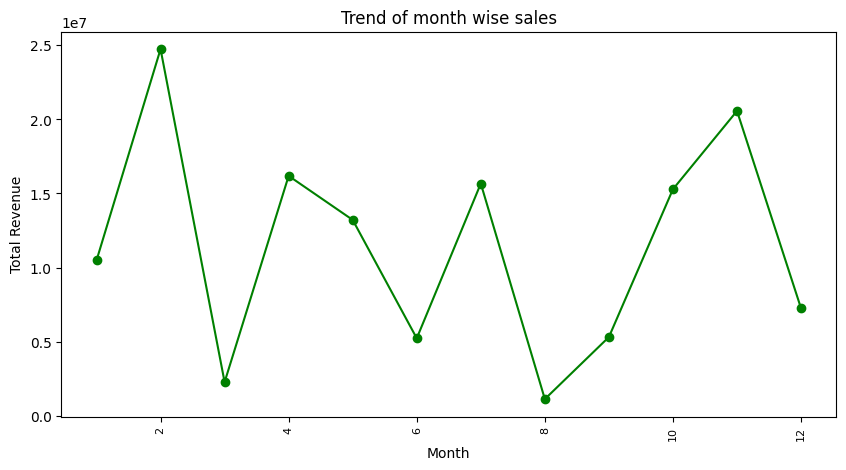


Annual Sales Trend:
Year
2010    19186024.92
2011    11129166.07
2012    31898644.52
2013    20330448.66
2014    16630214.43
2015    12427982.86
2016    12372867.22
2017    13373419.63
Name: Total Revenue, dtype: float64


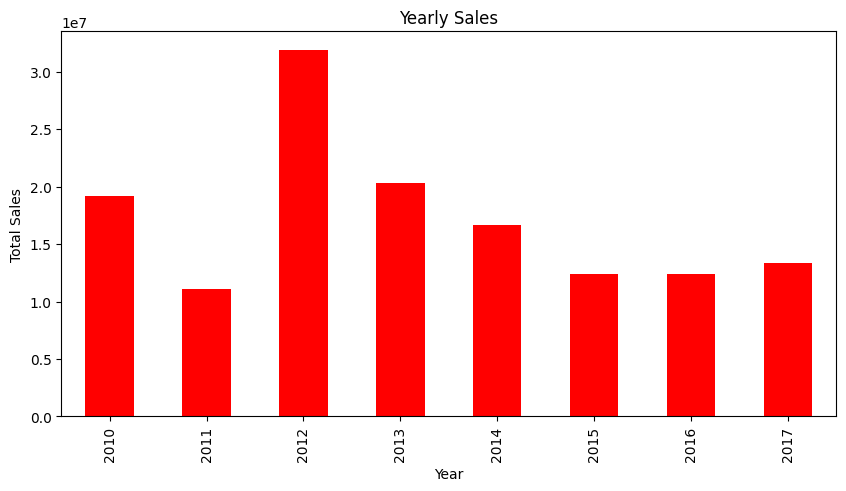


Sales Trend by Year-Month:
Year-Month Period
2010-02    3410661.12
2010-05    2587973.26
2010-06    1082418.40
2010-10    6064933.75
2010-11    3458252.00
2010-12    2581786.39
2011-01    1042225.35
2011-02     387002.20
2011-04    2798046.49
2011-05     272410.45
2011-06      19103.44
2011-07      97040.64
2011-09     574951.92
2011-11    5938385.58
2012-01    1012884.00
2012-02    6707849.42
2012-03     994765.42
2012-04    4556012.38
2012-05    3782781.82
2012-06    2132075.27
2012-07    4445093.92
2012-08     576782.80
2012-09    4648152.72
2012-10    3042246.77
2013-02    3296425.02
2013-03     835759.10
2013-04    3262562.10
2013-06    1352867.40
2013-07    8545511.20
2013-08      89623.98
2013-09      71253.21
2013-10    2702770.40
2013-12     173676.25
2014-02    1819660.25
2014-04    4510578.10
2014-05    3060338.59
2014-06      75591.66
2014-07     688641.85
2014-08     455479.04
2014-09      20404.71
2014-10    1352370.65
2014-11    4647149.58
2015-01    5513227.50
2015-02 

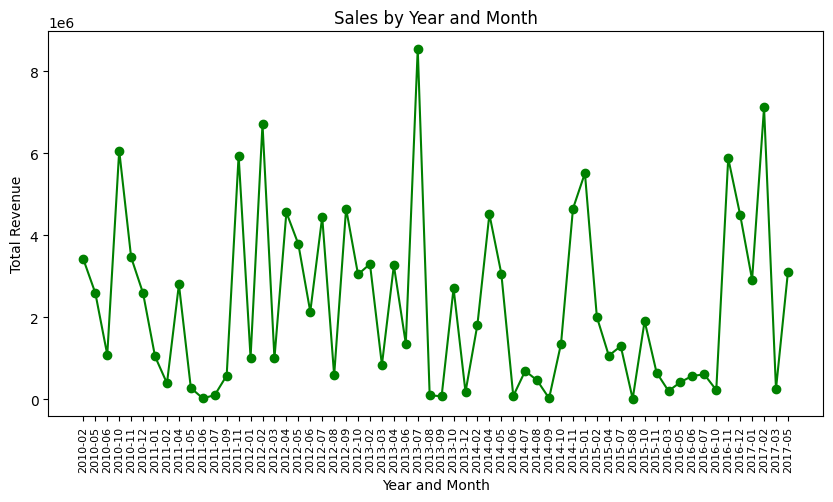

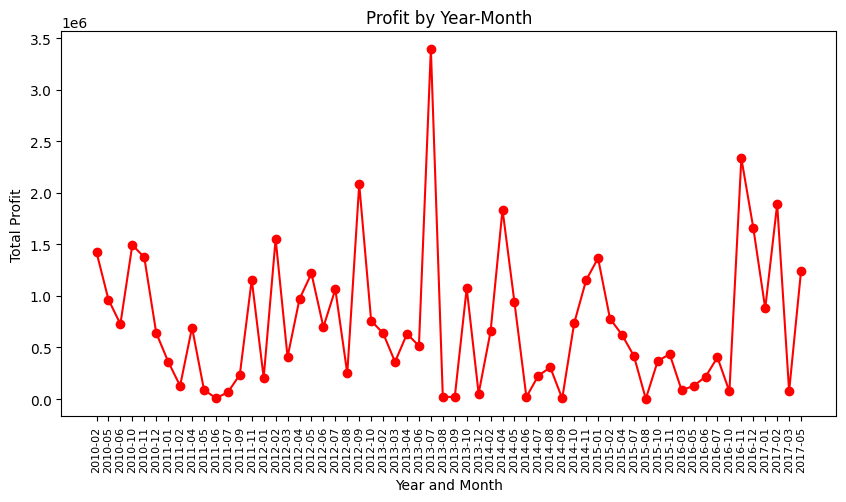

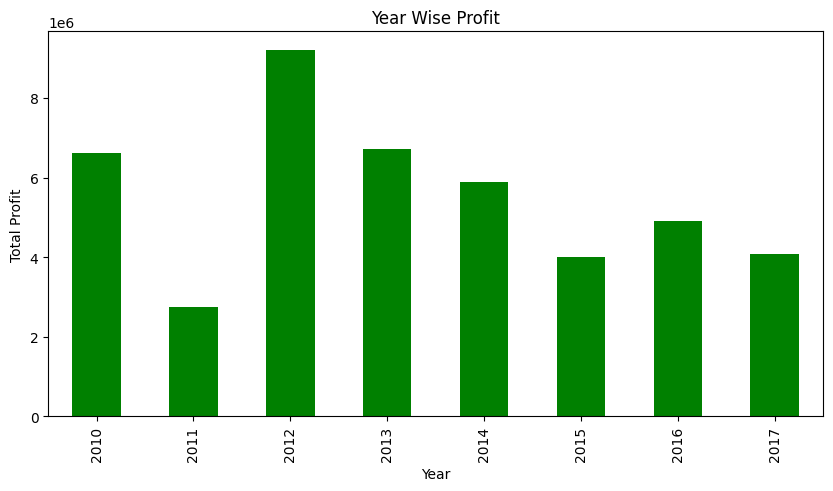

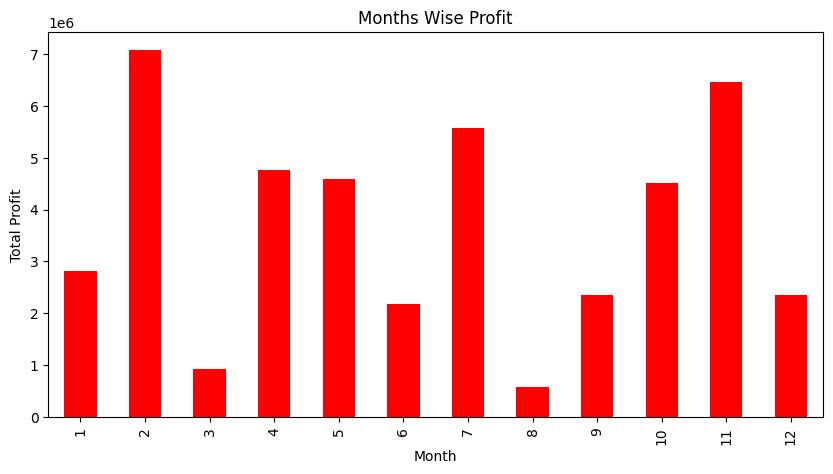

In [8]:
path = '/content/drive/MyDrive/Unified Mentor/Amazon Sales data.csv'
df = Data_Preprocessing(path)
Month_wise_sales_trend(df)
Year_wise_sales_trend(df)
Yearly_month_wise_sales_trend(df)
Trends_of_profit(df)